Analzying exit surveys from DETE and TAFE
(Surveys here:https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey
https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey )
in order to reply to the following questions:
--Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
--Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
#loading data
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [2]:
print(dete_survey.info())
print(dete_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [3]:
print(dete_survey['SeparationType'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


In [4]:
print(dete_survey['Position'].value_counts())
print(dete_survey['Cease Date'].value_counts())

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
Deputy Principal                                             4
Business Service Manager                                     4
Name: Position, dtype: int64
2012       344
2013       

In [5]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
818,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
820,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True


In [6]:
print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
print(tafe_survey.columns)
print(tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts())

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

Few data missing in DEFE, more missing in TAFE.

In [8]:
#dropping columns I will not use
dete_survey_updated=dete_survey.copy().drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated=tafe_survey.copy().drop(tafe_survey.columns[17:66], axis=1)

We dropped nonessential columns and also replaces "Not Stated" values with NaN values when loading the csv data for the DETE Survey

We will first standardize the column name format in the DETE df.

In [9]:
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [10]:
dete_survey_updated.columns=dete_survey_updated.columns.str.replace('\s+','_').str.strip().str.lower()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [11]:
same_columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated=tafe_survey_updated.rename(columns=same_columns)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Changed column names in TAFE survey in order to have them be named the same as relevant columns in DETE dataset.

In [12]:
print(tafe_survey_updated['separationtype'].value_counts())
print(dete_survey_updated['separationtype'].value_counts())

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Now we only focus on the group of employees that resigned, in both datasets.

In [13]:
tafe_resignations=tafe_survey_updated.copy()[tafe_survey_updated['separationtype']=='Resignation']
print(tafe_resignations.head())

             id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                                                  -   
7                     

In [14]:
resignation_types=['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate']
dete_resignations=dete_survey_updated.copy()[dete_survey_updated['separationtype'].isin(resignation_types)]
print(dete_resignations.head())

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...  work_life_balance  \
3

Cleaning the data itself: looking at cease_date and extracting the year only

In [15]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [16]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str[-4:].astype(float)
print(dete_resignations['cease_date'].value_counts()) #looks good

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [17]:
print(dete_resignations['dete_start_date'].value_counts().sort_index()) #looks good

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [18]:
print(tafe_resignations['cease_date'].value_counts().sort_index())

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


In [19]:
print(dete_resignations.boxplot(column=['cease_date','dete_start_date']))

AxesSubplot(0.125,0.11;0.775x0.77)


The employees in the DETE survey have been emplyed over a wide range of years. Given thet the survey was probably used in 2013, the 2010 and 2006 cease dates are probably wrong.

In [20]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
print(dete_resignations['institute_service'])

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64


In [21]:
dete_resignations.head() 
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


We built a new column in the DETE dataset, containing the duration of employment.

Now we will identify the employees that cited some sort of job dissatisfaction.

In [22]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [23]:
d={'Contributing Factors. Dissatisfaction ':True,'-':False}
tafe_resignations['Contributing Factors. Dissatisfaction']=tafe_resignations['Contributing Factors. Dissatisfaction'].copy().map(d)


In [24]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Dissatisfaction'].to_string())

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16       NaN
17     False
18       NaN
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
45     False
46     False
47      True
49     False
51       NaN
52     False
53     False
54      True
55     False
56     False
58     False
63     False
64      True
65      True
66     False
69     False
71      True
72     False
74     False
79     False
80     False
81     False
82     False
84     False
85     False
86      True
87     False
88     False
89     False
91     False
92     False
93     False
94     False
96     False
97      True
98     False
100     True
101     True
102     True
103   

In [25]:
d1={'Job Dissatisfaction':True,'-':False}
tafe_resignations['Contributing Factors. Job Dissatisfaction']=tafe_resignations['Contributing Factors. Job Dissatisfaction'].copy().map(d1)
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64


Create a dissatisfied column in both DETE and TAFE dataframes 

In [26]:
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].any(axis='columns')
print(tafe_resignations['dissatisfied'].value_counts(dropna=False))

False    249
True      91
Name: dissatisfied, dtype: int64


In [27]:
print(dete_resignations.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')


In [28]:
pd.set_option('display.max_columns', 999)
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [29]:
dete_resignations['dissatisfied']=dete_resignations[['interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions','work_life_balance', 'workload']].any(axis='columns')
print(dete_resignations['dissatisfied'].value_counts())

False    157
True     154
Name: dissatisfied, dtype: int64


In [30]:
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

We just isolated the variables we needed: time of emplyment at the institute, as well as if there was any source of job dissatisfaction, and we updated our dataframes accordingly.

preparing to merge the two datasets:

In [31]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [32]:
print(dete_resignations_up.head())
print(tafe_resignations_up.head())

    id                        separationtype  cease_date  dete_start_date  \
3    4             Resignation-Other reasons      2012.0           2005.0   
5    6             Resignation-Other reasons      2012.0           1994.0   
8    9             Resignation-Other reasons      2012.0           2009.0   
9   10            Resignation-Other employer      2012.0           1997.0   
11  12  Resignation-Move overseas/interstate      2012.0           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  career_move_to_public

In [33]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True ,sort=False, axis=0)

In [34]:
combined_updated=combined.dropna(axis='columns',thresh=500)
print(combined_updated.head())

     id                        separationtype  cease_date          position  \
0   4.0             Resignation-Other reasons      2012.0           Teacher   
1   6.0             Resignation-Other reasons      2012.0  Guidance Officer   
2   9.0             Resignation-Other reasons      2012.0           Teacher   
3  10.0            Resignation-Other employer      2012.0      Teacher Aide   
4  12.0  Resignation-Move overseas/interstate      2012.0           Teacher   

     employment_status  gender    age institute_service  dissatisfied  \
0  Permanent Full-time  Female  36-40                 7         False   
1  Permanent Full-time  Female  41-45                18          True   
2  Permanent Full-time  Female  31-35                 3         False   
3  Permanent Part-time  Female  46-50                15          True   
4  Permanent Full-time    Male  31-35                 3         False   

  institute  
0      DETE  
1      DETE  
2      DETE  
3      DETE  
4      DETE  


We merged the two datasets and eliminated columns that were not of interest for both.

In [35]:
print(combined_updated['institute_service'].value_counts())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


In [36]:
print(combined_updated['institute_service'])

0        7
1       18
2        3
3       15
4        3
      ... 
646    5-6
647    1-2
648    NaN
649    5-6
650    3-4
Name: institute_service, Length: 651, dtype: object


In [37]:
print(combined_updated['institute_service'].value_counts())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


In [38]:
#print(combined_updated.loc[3,'institute_service'])

Turning this column to an all-string series.


In [39]:
x=combined_updated['institute_service'].astype('str',copy= False)
#print(x)
combined_updated=combined_updated.copy()
combined_updated['institute_service']=x
print(combined_updated['institute_service'])

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646     5-6
647     1-2
648     nan
649     5-6
650     3-4
Name: institute_service, Length: 651, dtype: object


Now we will clean this Series as follows: turn words into numbers
(More than 20 years -----> 20+)
(Less than one year ----->0 )

In [40]:
combined_updated['institute_service']=combined_updated['institute_service'].replace('More than 20 years','20+').replace('Less than 1 year','0')
#print(combined_updated['institute_service'].value_counts())

In [41]:
combined_updated['duration_classification']=(combined_updated['institute_service'].str.replace('-',' ')
                                                                                  .str.replace('.',' ')
                                                                                  .str.replace('+',' ')
                                                                                  .str.split()
                                                                                  .str.get(0)
                                                                                  .astype('float64'))

#print(combined_updated['duration_classification'].value_counts())

Now that we obtained an approximate duration of service for all the employees, we will assign one of the four categories (New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company) to each one of them using a function.

In [42]:
def career_stage(years):
    if pd.isnull(years):
        return None
    if years<3:
        return "New"
    if years>=3 and years <7:
        return "Experienced"
    if years>=7 and years<11:
        return "Established"
    if years>10:
        return "Veteran"
combined_updated['service_cat']=combined_updated['duration_classification'].apply(career_stage)
print(combined_updated['service_cat'].value_counts(dropna=False))

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64


Now we are taking a closer look at the 'dissatisfied' columnn

In [43]:
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    406
True     245
Name: dissatisfied, dtype: int64


No we create a pivot table to aggregate the data (percent of dissatisfied former employees) by employment duration.

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.300518
Veteran          0.507353


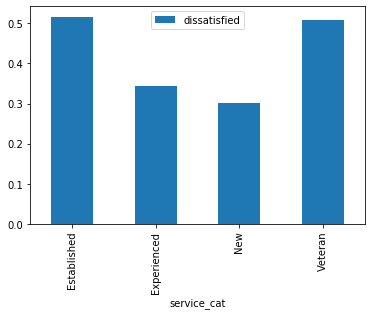

In [44]:
table=pd.pivot_table(combined_updated,values='dissatisfied',index='service_cat')
print(table)
%matplotlib inline
table.plot(kind='bar')

                       dissatisfied
institute service_cat              
DETE      Established      0.609756
          Experienced      0.460526
          New              0.392857
          Veteran          0.590000
TAFE      Established      0.333333
          Experienced      0.250000
          New              0.262774
          Veteran          0.277778


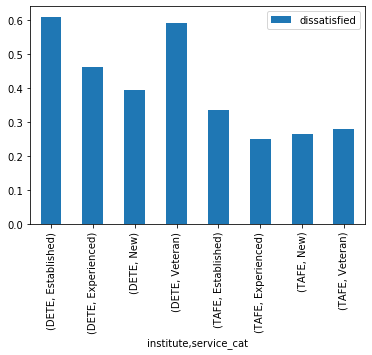

In [45]:
table2=pd.pivot_table(combined_updated,values='dissatisfied',index=['institute','service_cat'])
print(table2)
%matplotlib inline
table2.plot(kind='bar')

Observations: Established and Veteran employees (those who have been employed for 7 years or more) who resign are more likely (around 20% more) to have experienced some form of dissatisfaction at their job than their less veteran coleagues who choose to resign.
When aggregating by institute, we notice that DETE employees are more likely to experience some form of dissatisfaction and the diffetrences between employee groups are more pronounced.

In [46]:
print(combined_updated.info())
print(combined_updated.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 12 columns):
id                         651 non-null float64
separationtype             651 non-null object
cease_date                 635 non-null float64
position                   598 non-null object
employment_status          597 non-null object
gender                     592 non-null object
age                        596 non-null object
institute_service          651 non-null object
dissatisfied               651 non-null bool
institute                  651 non-null object
duration_classification    563 non-null float64
service_cat                563 non-null object
dtypes: bool(1), float64(3), object(8)
memory usage: 56.7+ KB
None
     id                        separationtype  cease_date          position  \
0   4.0             Resignation-Other reasons      2012.0           Teacher   
1   6.0             Resignation-Other reasons      2012.0  Guidance Officer   
2   9.0             Resign

In [47]:
print(combined_updated['employment_status'].value_counts(dropna=False))
combined_updated['employment_status']=combined_updated['employment_status'].str.replace('Contract/casual','Casual')

Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64


In [48]:
print(combined_updated['age'].value_counts(dropna=False))

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64


In [49]:
combined_updated['age']=(combined_updated['age'].str.replace('-',' ')
                                                .str.split()
                                                .str.get(0)
                                                .astype('float64'))
print(combined_updated['age'].value_counts(dropna=False))

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64


In [50]:
def age_group(years):
    if pd.isnull(years):
        return None
    if years<30:
        return "20'"
    if years>=30 and years <40:
        return "30'"
    if years>=40 and years<50:
        return "40'"
    if years>=50 and years<60:
        return "50'"
    if years>=60:
        return "60'"
combined_updated['age_group']=combined_updated['age'].apply(age_group)
print(combined_updated['age_group'].value_counts(dropna=False))

40'    174
20'    139
30'    134
50'    126
NaN     55
60'     23
Name: age_group, dtype: int64


             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.300518
Veteran          0.507353


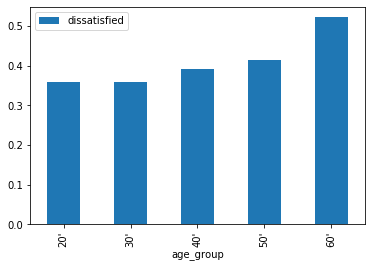

In [51]:
table3=pd.pivot_table(combined_updated,values='dissatisfied',index=['age_group'])
print(table3)
%matplotlib inline
table3.plot(kind='bar')

The chance of experiencing dissatisfaction in the workplaces increases steadily with age.

                     dissatisfied
institute age_group              
DETE      20'            0.461538
          30'            0.457143
          40'            0.488889
          50'            0.603448
          60'            0.521739
TAFE      20'            0.270270
          30'            0.250000
          40'            0.285714
          50'            0.250000


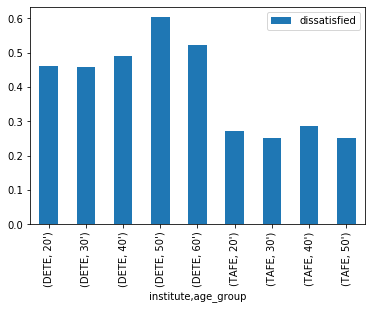

In [52]:
table4=pd.pivot_table(combined_updated,values='dissatisfied',index=['institute','age_group'])
print(table4)
%matplotlib inline
table4.plot(kind='bar')